In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings as fw
fw("ignore")

In [27]:
df=pd.read_csv(r"C:\Users\NAWAB\Downloads\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [36]:
df.drop(columns=['CustomerID','Gender'],inplace=True)

KeyError: "['CustomerID', 'Gender'] not found in axis"

In [ ]:
df

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

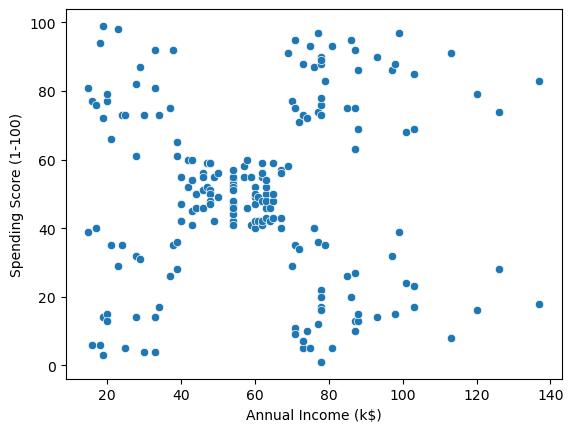

In [34]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

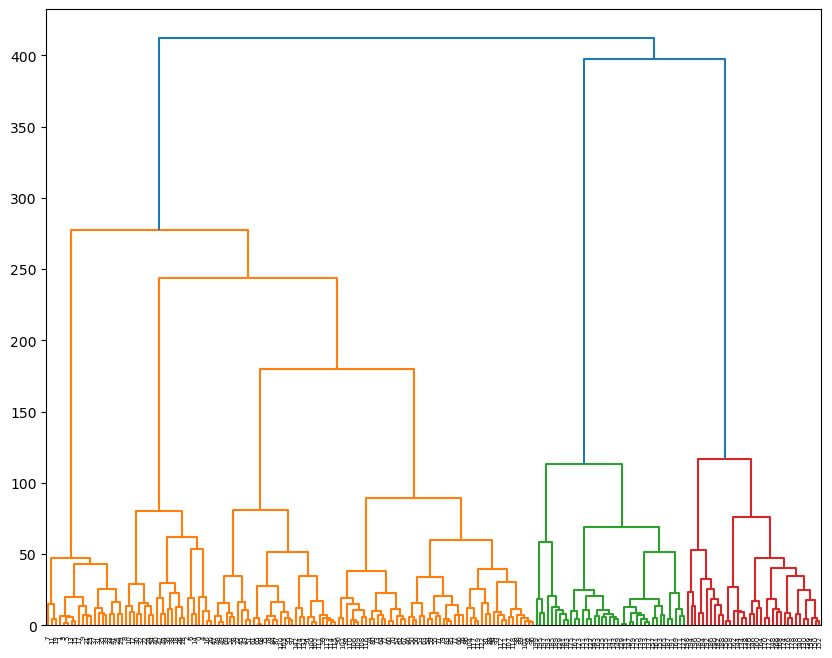

In [37]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(10,8))
link=linkage(df,method="ward")
dendrogram=dendrogram(link)

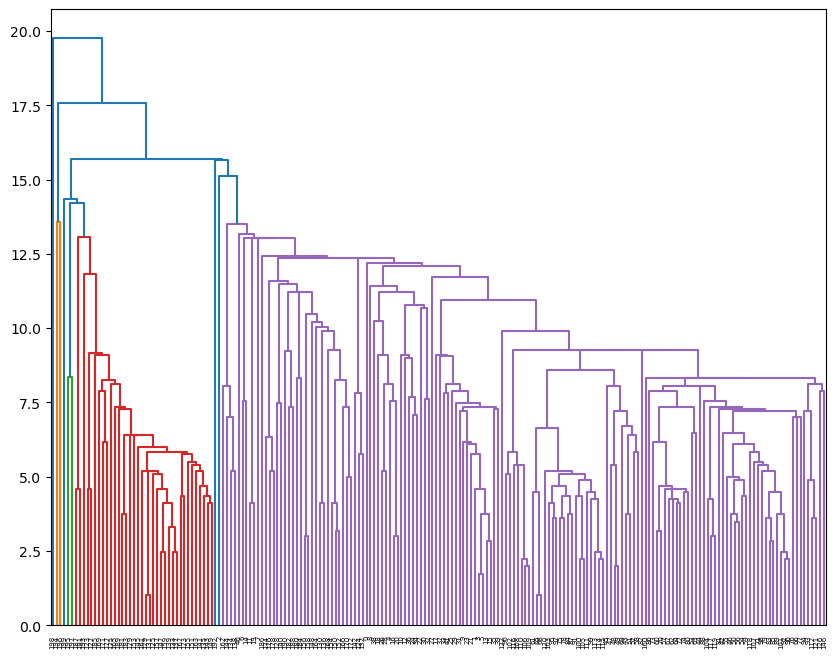

In [38]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(10,8))
link=linkage(df,method="single")
dendrogram=dendrogram(link)

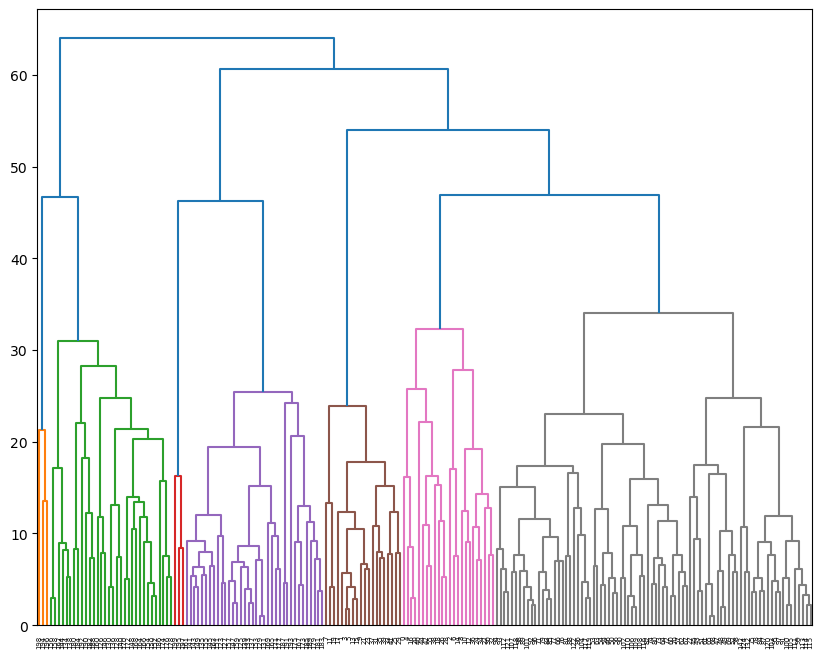

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(10,8))
link=linkage(df,method="average")
dendrogram=dendrogram(link)

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
cluster=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

In [41]:
labels=cluster.fit_predict(df)

In [42]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

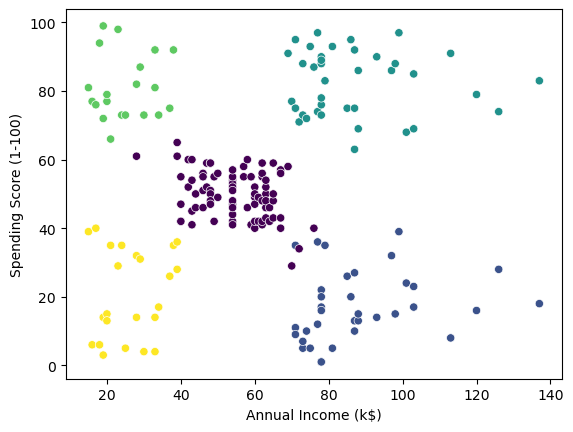

In [43]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=cluster.labels_)

In [44]:
from sklearn.metrics import silhouette_score
silhouette_score(df,labels)

0.4401889024290193

In [45]:
for i in range(3,10):
    cluster=AgglomerativeClustering(n_clusters=i,affinity="enclidean",linkage="ward")
    l=cluster.fit_predict(df)
    print(i,': ',silhouette_score(df,l))

InvalidParameterError: The 'affinity' parameter of AgglomerativeClustering must be a str among {'dice', 'correlation', 'l1', 'sokalmichener', 'cityblock', 'chebyshev', 'cosine', 'russellrao', 'sqeuclidean', 'matching', 'rogerstanimoto', 'kulsinski', 'minkowski', 'braycurtis', 'yule', 'manhattan', 'hamming', 'wminkowski', 'jaccard', 'canberra', 'seuclidean', 'nan_euclidean', 'precomputed', 'euclidean', 'sokalsneath', 'haversine', 'mahalanobis', 'l2'} or a callable. Got 'enclidean' instead.

In [46]:
for i in range(3,10):
    cluster=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="single") 
    l=cluster.fit_predict(df)
    print(i,' : ',silhouette_score(df,l))

3  :  0.3049360034125826
4  :  0.26287653629417757
5  :  0.24294247504120228
6  :  0.16494447557214534
7  :  0.1365029737488583
8  :  0.12027212667359578
9  :  0.11645642399674593


In [48]:
for i in range(3,10):
    cluster=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="ward") 
    l=cluster.fit_predict(df)
    print(i,' : ',silhouette_score(df,l))
    

3  :  0.38141795042544546
4  :  0.41037986351850747
5  :  0.4401889024290193
6  :  0.44308912983504156
7  :  0.4262301125101286
8  :  0.41028404899198817
9  :  0.3663955117052502


In [54]:
for i in range(3,10):
    cluster=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="average") 
    l=cluster.fit_predict(df)
    print(i,' : ',silhouette_score(df,l))
    
    

3  :  0.38141795042544546
4  :  0.41037986351850747
5  :  0.43542057757306424
6  :  0.4186188585821039
7  :  0.4102108627180583
8  :  0.42466650196497924
9  :  0.41043092534302317


In [50]:
for i in range(3,10):
    cluster=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="single") 
    l=cluster.fit_predict(df)
    print(i,' : ',silhouette_score(df,l))

3  :  0.3049360034125826
4  :  0.26287653629417757
5  :  0.24294247504120228
6  :  0.16494447557214534
7  :  0.1365029737488583
8  :  0.12027212667359578
9  :  0.11645642399674593


# DBSCAN

In [60]:
from sklearn.datasets import make_moons

In [61]:
x,y=make_moons(n_samples=1000,noise=0.05)

In [62]:
x

array([[ 0.3046355 , -0.26406588],
       [ 0.23243871, -0.04411973],
       [ 1.72757725, -0.12154387],
       ...,
       [ 1.79758469, -0.16767571],
       [ 0.93477939,  0.38749382],
       [ 1.03833948, -0.52150922]])

In [63]:
y

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

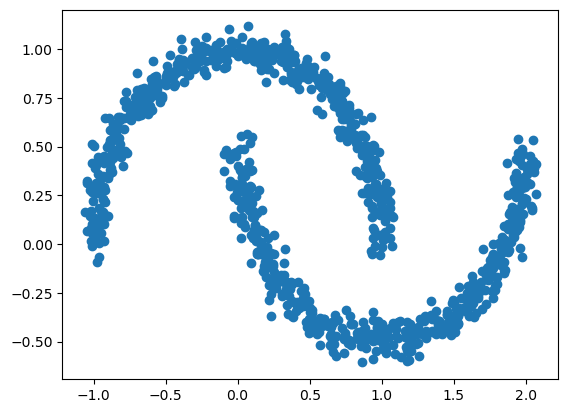

In [65]:
plt.scatter(x[:,0],x[:,1])

In [66]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(x)

In [67]:
X

array([[-0.22780374, -1.04346205],
       [-0.31116825, -0.59773155],
       [ 1.41524482, -0.75463497],
       ...,
       [ 1.49608132, -0.84812316],
       [ 0.49981355,  0.27695222],
       [ 0.61939276, -1.56518227]])

In [68]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.1)

In [69]:
db.fit(X)

DBSCAN(eps=0.1)

In [70]:
db.labels_

array([ 0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,
        0,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  2,  0,
        1,  1,  1,  1,  1,  0,  2,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1, -1,  0,
        1,  0,  0,  1,  0,  1,  0,  0,  0,  1, -1,  0,  0,  1,  0,  0,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,
        1,  1,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0, -1,  1,  1,  0,  0,  1,
        1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  1,  2,  0, -1

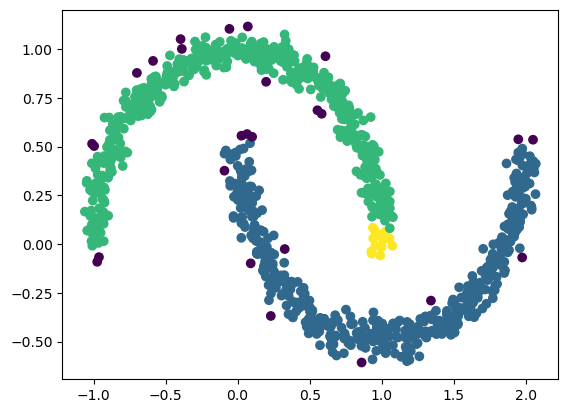

In [71]:
plt.scatter(x[:,0],x[:,1],c=db.labels_)

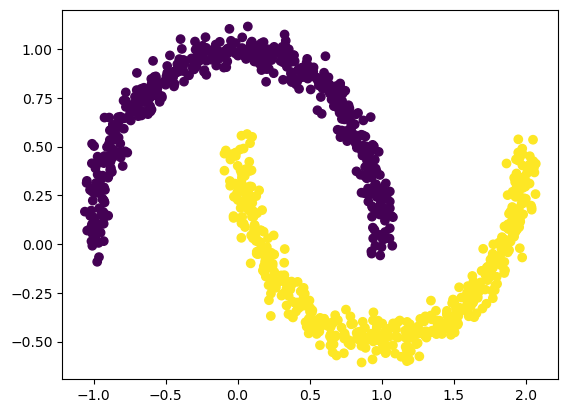

In [72]:
plt.scatter(x[:,0],x[:,1],c=y)